In [2]:
%load_ext autoreload
%autoreload 2

import imbalanced as imb

data = imb.load_data("data_for_student_case.csv")

In [3]:
pdata = imb.pre_process(data)
imb.describe_data(pdata)

pdata.head()

Total: 237036
Non-Fraud: 236691 = 99.8545%
Fraud: 345 = 0.1455%



,issuercountrycode,txvariantcode,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cvcresponsecode,accountcode,mail_id,ip_id,card_id
0,76.0,2.0,64800.0,2.0,98.0,0.0,1.0,0.0,1.0,187702.0,7386.0,73358.0
1,76.0,2.0,44900.0,2.0,98.0,0.0,1.0,0.0,1.0,834.0,194109.0,44739.0
2,76.0,2.0,149900.0,2.0,98.0,0.0,1.0,0.0,1.0,119287.0,189655.0,122802.0
3,76.0,2.0,109900.0,2.0,98.0,0.0,1.0,0.0,1.0,173561.0,8254.0,70712.0
4,76.0,6.0,89900.0,2.0,98.0,0.0,1.0,0.0,1.0,70647.0,196247.0,208481.0


KNN UNSMOTEd:
Accuracy: 0.998453122583004
Precision: 0.0
Recall: 0.0
F1: 0.0

KNN SMOTEd:
Accuracy: 0.9866968542138347
Precision: 0.02367531003382187
Recall: 0.2079207920792079
F1: 0.04251012145748988



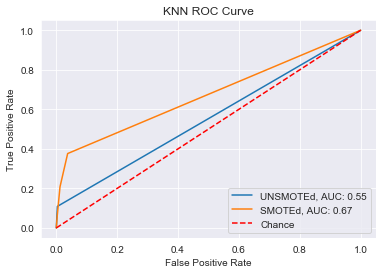

LogisticRegression UNSMOTEd:
Accuracy: 0.998410935017086
Precision: 0.07142857142857142
Recall: 0.009900990099009901
F1: 0.017391304347826087

LogisticRegression SMOTEd:
Accuracy: 0.9939390530297704
Precision: 0.020348837209302327
Recall: 0.06930693069306931
F1: 0.03146067415730337



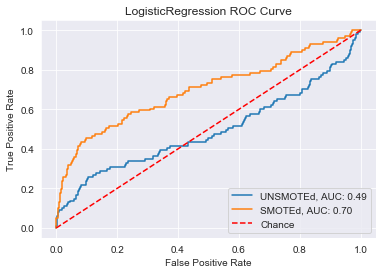

RandomForest UNSMOTEd:
Accuracy: 0.9986078103247036
Precision: 1.0
Recall: 0.019801980198019802
F1: 0.038834951456310676

RandomForest SMOTEd:
Accuracy: 0.9974828085668884
Precision: 0.175
Recall: 0.2079207920792079
F1: 0.19004524886877827



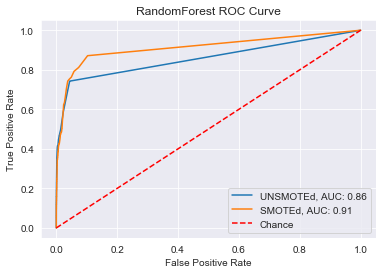

In [12]:
# Get feature vector and truth vector from dataset
X, y = imb.get_X_y(pdata)

# Classifiers to include.
classifiers = ["KNN","LogisticRegression","RandomForest"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_UNSMOTEd = imb.classify(clf, X, y, 0)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd, y_test_SMOTEd = imb.classify(clf, X, y, 25)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)

165925
165925
165925
177475
LogisticRegression UNSMOTEd:
Accuracy: 0.9983265598852499
Precision: 0.0
Recall: 0.0
F1: 0.0

LogisticRegression SMOTEd:
Accuracy: 0.9891999831249736
Precision: 0.023323615160349854
Recall: 0.14035087719298245
F1: 0.04



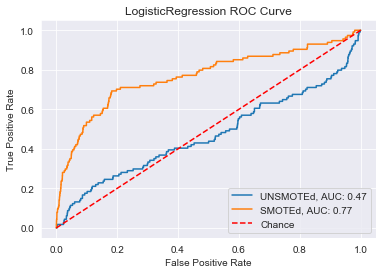

165925
165925
165925
177475
NaiveBayes UNSMOTEd:
Accuracy: 0.9813812209081577
Precision: 0.014446227929373997
Recall: 0.15789473684210525
F1: 0.026470588235294117

NaiveBayes SMOTEd:
Accuracy: 0.9240623813474709
Precision: 0.00727069351230425
Recall: 0.34210526315789475
F1: 0.014238773274917854



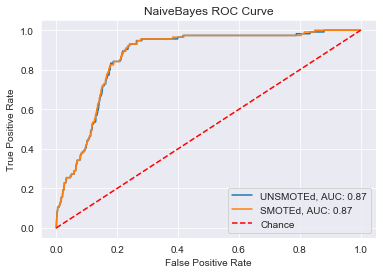

165925
165925


In [ ]:
# Classifiers to include.
# Choose out of: KNN, RandomForest, NaiveBayes, SupportVectorMachines, LogisticRegression, DecisionTree
classifiers = ["LogisticRegression","NaiveBayes","SupportVectorMachines"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_UNSMOTEd = imb.classify(clf, X, y, 0)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd, y_test_SMOTEd = imb.classify(clf, X, y, 50)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)

KNN UNSMOTEd:
Accuracy: 0.9983828099731406
Precision: 0.4
Recall: 0.017543859649122806
F1: 0.03361344537815126

KNN SMOTEd:
Accuracy: 0.9853630138885039
Precision: 0.5588547189819725
Recall: 0.45158526135389887
F1: 0.49952606635071084



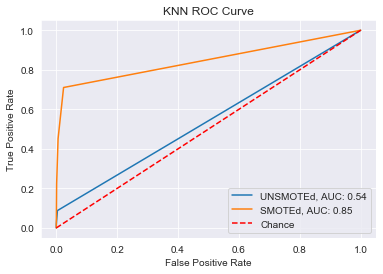

LinearDiscriminantAnalysis UNSMOTEd:
Accuracy: 0.9875546680541688
Precision: 0.023485784919653894
Recall: 0.16666666666666666
F1: 0.041170097508125676

LinearDiscriminantAnalysis SMOTEd:
Accuracy: 0.968328112438666
Precision: 0.18840579710144928
Recall: 0.28963153384747214
F1: 0.22830124957784534



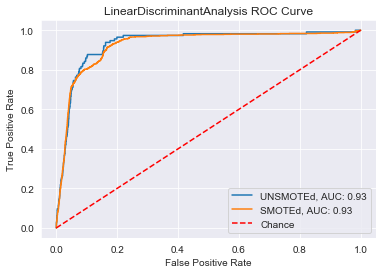

QuadraticDiscriminantAnalysis UNSMOTEd:
Accuracy: 0.9661515096117338
Precision: 0.01233517652062952
Recall: 0.2543859649122807
F1: 0.023529411764705882

QuadraticDiscriminantAnalysis SMOTEd:
Accuracy: 0.9535247969395393
Precision: 0.1770094562647754
Recall: 0.5132819194515853
F1: 0.26323884860470226



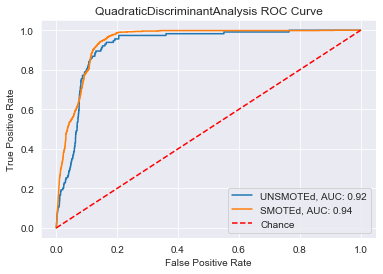

In [386]:
# Classifiers to include.
# Choose out of: KNN, RandomForest, NaiveBayes, SupportVectorMachines, LogisticRegression, DecisionTree
classifiers = ["KNN","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd = imb.classify(clf, X_train_UNSMOTEd, y_train_UNSMOTEd, X_test_UNSMOTEd)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd = imb.classify(clf, X_train_SMOTEd, y_train_SMOTEd, X_test_SMOTEd)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)

KNN UNSMOTEd:
Accuracy: 0.998453122583004
Precision: 0.0
Recall: 0.0
F1: 0.0

KNN SMOTEd:
Accuracy: 0.984739278684889
Precision: 0.5280269058295964
Recall: 0.4092093831450912
F1: 0.46108663729809096



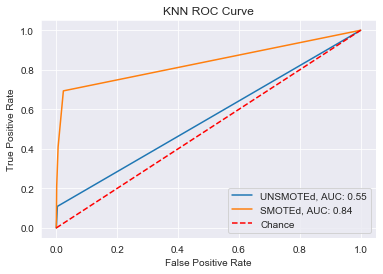

DecisionTree UNSMOTEd:
Accuracy: 0.9972859332592707
Precision: 0.11016949152542373
Recall: 0.12871287128712872
F1: 0.11872146118721462

DecisionTree SMOTEd:
Accuracy: 0.9923211266043855
Precision: 0.7493734335839599
Recall: 0.7793223284100782
F1: 0.7640545144804088



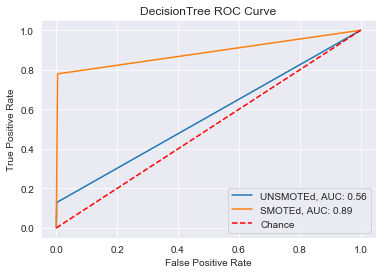

LogisticRegression UNSMOTEd:
Accuracy: 0.998410935017086
Precision: 0.07142857142857142
Recall: 0.009900990099009901
F1: 0.017391304347826087

LogisticRegression SMOTEd:
Accuracy: 0.9830205416793724
Precision: 0.2897727272727273
Recall: 0.044309296264118156
F1: 0.07686510926902788



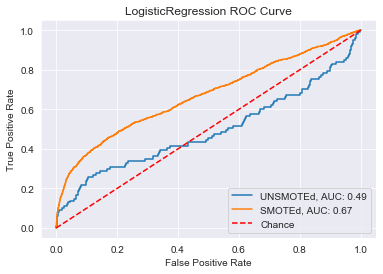

In [383]:
# Classifiers to include.
# Choose out of: KNN, RandomForest, NaiveBayes, SupportVectorMachines, LogisticRegression, DecisionTree
classifiers = ["KNN","DecisionTree","LogisticRegression"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd = imb.classify(clf, X_train_UNSMOTEd, y_train_UNSMOTEd, X_test_UNSMOTEd)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd = imb.classify(clf, X_train_SMOTEd, y_train_SMOTEd, X_test_SMOTEd)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)